# Price Prediction for Myntra Products 

Abstract: The data is from the Myntra company. Regression task is to predict the price of the products on Myntra's website.
    
Attribute Information:

Data:
    
ID : (numerical)
NAME : (categorical)
IMG : (categorical)
MRP : (numerical)
RATING  (numerical)
RATINGTOTAL : (numerical)
DISCOUNT : (numerical)
SELLER :(categorical
PURL : (Link)
PRICE : (numerical)

# Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\nikhi\\Documents\\BIA\\Projects\\capstone_myntra_dataset.csv')

In [3]:
df_1 = df

In [4]:
df_1.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


In [5]:
df_1.isnull().sum()

id             0
name           0
img            0
asin           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
purl           0
dtype: int64

### It appears that there are no null values in the data.

In [6]:
df_1.describe()

,id,price,mrp,rating,ratingTotal,discount
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04


# Data Pre - Processing:

### We are spliting the url data into category and path

In [4]:
def split_url(url):
    parts = url.split('://')
    protocol = parts[0]
    domain_path = parts[1].split('/', 1)
    domain = domain_path[0]
    path = domain_path[1]
    category = path.split('/',1)[0] 
    return path , category

# Apply the function to the DataFrame
df_1[['path', 'category']] = df_1['purl'].apply(lambda x: pd.Series(split_url(x)))

# Display the DataFrame
print(df_1.head())

   id                                    name  \
0   1              Men Solid Oversized Cotton   
1   2          Men Cotton Pure Cotton T-shirt   
2   3               Women Pure Cotton T-shirt   
3   4                Typography Print T-shirt   
4   5  Printed Round Neck Pure Cotton T-shirt   

                                                 img asin  price     mrp  \
0  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  532.0  1299.0   
1  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  274.0   499.0   
2  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  551.0  1199.0   
3  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  296.0  1099.0   
4  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  494.0   899.0   

   rating  ratingTotal  discount                 seller  \
0     4.1         5300        59  Difference of Opinion   
1     4.2        25400        45               Roadster   
2     4.5         3400        54              DILLINGER   
3     4.0   

### We are splitting different category into specific types and storing it into new column Types

In [5]:
cloths = ["tshirts", "shorts", "shirts", "tops", "dresses", "jeans", "co-ords", "tights", "leggings", "jumpsuit", "trousers", "track-pants", "shrug", "kurtas", "sarees", "lehenga-choli", "kurta-sets", "ethnic-dresses", "kurtis", "briefs", "lingerie-set", "churidar", "swimwear-cover-up-top", "shapewear", "bra", "sweatshirts", "socks", "swimwear", "nightdress", "lounge-pants", "night-suits", "baby-dolls", "lounge-shorts", "blazers", "innerwear-vests", "trunk", "boxers", "lounge-tshirts", "tracksuits", "clothing-set", "capris", "stockings", "thermal-bottoms", "thermal-tops", "thermal-set", "swim-tops", "swim-bottoms", "skirts", "sweaters", "jeggings", "rompers", "dungarees", "salwar-and-dupatta", "patiala-and-dupatta", "palazzos", "thermal-set"]
jewelry = ["jewellery-set", "ring", "earrings", "anklet", "necklace-and-chains", "bangle","bracelet", "mangalsutra", "gold-coin", "pendant-gold", "earrings-gold", "ring-gold", "necklace-and-chains-diamond", "nosepin-gold", "bangle-gold", "nosepin-diamond", "bracelet-diamond", "pendant-diamond", "earrings-diamond", "ring-diamond"]
accessories = ["sunglasses", "hair-accessory", "belts", "handbags", "backpacks", "trolley-bag", "laptop-bag", "duffel-bag", "rucksacks", "wallets", "messenger-bag", "waist-pouch", "clutches", "scarves", "outdoor-masks", "caps", "headband", "tie", "cufflinks", "watch-gift-set", "watch-straps"]
beauty_personal_care = ["lipstick", "lip-care", "lip-gloss", "lip-liner", "lip-plumper", "eyeshadow", "eyebrow-enhancer", "kajal-and-eyeliner", "mascara", "eye-primer", "eyelash", "eye-brow-pencils", "foundation", "compact", "concealer", "face-primer", "bb-and-cc-cream", "highlighter-and-blush", "face-wash-and-cleanser", "face-moisturisers", "face-scrub-and-exfoliator", "face-pack-and-mask", "face-serum-and-gel", "toner", "makeup-remover", "makeup-tools-and-brushes", "sunscreen", "body-wash-and-scrub", "bath-and-body-gift-set", "body-lotion", "perfume-and-body-mist", "shampoo-and-conditioner", "hair-oil", "hair-cream-and-mask", "hair-serum", "hair-colour"]
electronics = ["smart-watches", "watches", "trimmer", "hair-appliance", "headphones", "earphones", "speakers", "powerbank", "charger", "mobile-accessories"]
footwear = ["flip-flops", "heels", "flats", "sports-shoes", "casual-shoes", "sandals", "loafers", "formal-shoes"]
toys_and_games = ["soft-toys-and-dolls", "activity-toys-and-games", "learning-and-development-toys"]
home_and_living = ["bedsheets", "bed-covers", "blankets-quilts-and-dohars", "bedding-set", "doormats", "carpets", "floor-runners", "cushion-covers", "curtains", "table-covers", "sofa-covers"]

def type(item):
    if item in cloths:
        return "clothing"
    elif item in jewelry :
        return "jewelry"
    elif item in accessories:
        return "accessories"
    elif item in beauty_personal_care:
        return "beauty and personal care"
    elif item in electronics:
        return "electronics"
    elif item in footwear:
        return "footwear"
    elif item in toys_and_games:
        return "toys and games"
    else:
        return "home and living"

df_1['Types'] = df_1['category'].apply(type)
df_1.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl,path,category,Types
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,tshirts/difference-of-opinion/difference-of-op...,tshirts,clothing
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-black-cotton-pur...,tshirts,clothing
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,tshirts/dillinger/dillinger-women-navy-blue-ty...,tshirts,clothing
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,tshirts/huetrap/huetrap-men-beige--black-typog...,tshirts,clothing
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-green--white-pri...,tshirts,clothing


### We creating new column Gender, based on the different category into specific Gender 

In [6]:
men = ['shorts', 'sherwani', 'nehru-jackets', 'innerwear-vests', 'trunk', 'boxers', 'track-pants', 'waistcoat', 'shaving-essentials', 'trimmer', 'perfume-and-body-mist', 'deodorant', 'mens-grooming-kit', 'cufflinks',"Kurtas","Kurta-sets"]
women = ['camisoles', 'bangle', 'hair-brush-and-comb', 'massager', 'dresses', 'handbags', 'nail-essentials', 'epilator', 'bra', 'face-wash-and-cleanser', 'concealer', 'makeup-brushes', 'eye-cream', 'scarves', 'sarees', 'lip-liner', 'hair-care-kit', 'bb-and-cc-cream', 'foundation', 'bodysuit', 'lip-plumper', 'compact', 'body-lotion', 'pyjamas', 'slips', 'capris', 'beauty-gift-set', 'foundation-and-primer', 'watch-straps', 'churidar', 'eyebrow-enhancer', 'hair-serum', 'false-eyelashes', 'leggings', 'swimwear-cover-up-top', 'kurtis', 'ring', 'setting-spray', 'face-scrub-and-exfoliator', 'feminine-hygiene', 'tights', 'hair-accessory', 'hair-colour', 'beauty-accessory', 'face-moisturisers', 'sunscreen', 'hair-cream-and-mask', 'face-serum-and-gel', 'body-wash-and-scrub', 'toner', 'jumpsuit', 'nail-polish', 'mangalsutra', 'facial-kit', 'lingerie-accessories', 'lingerie-set', 'ethnic-dresses', 'jewellery-set', 'nightdress', 'necklace-and-chains', 'shampoo-and-conditioner', 'tops', 'hair-gel-and-spray', 'shrug', 'lipstick', 'highlighter-and-blush', 'clutches', 'shapewear', 'body-wax-and-essentials', 'eye-primer', 'briefs', 'bracelet', 'hair-spray', 'night-suits', 'earrings', 'lehenga-choli', 'body-oil', 'hair-masks', 'makeup-remover', 'lip-gloss', 'anklet', 'lounge-pants', 'corset', 'lounge-shorts', 'co-ords']
kids = ['soft-toys-and-dolls', 'activity-toys-and-games', 'learning-and-development-toys', 'baby-dolls', 'rompers', 'dungarees', 'musical-toys', 'bibs', 'diaper-bags', 'baby-care-products', 'baby-apparel-gift-set', 'strollers', 'baby-carriers', 'baby-bed-sets', 'booties', 'mittens', 'baby-hair-brush', 'baby-oral-care', 'baby-sleeping-bag', 'baby-nail-grooming', 'baby-sippers', 'baby-bathers', 'feeding-essentials', 'baby-bath-sponges', 'baby-utensils', 'feeding-bottles', 'rockers', 'cradles', 'walkers', 'high-chairs', 'bath-tub', 'car-seats', 'baby-pool', 'baby-pillow', 'swings', 'baby-shower-caps', 'baby-pillow', 'baby-care-products', 'baby-gear--nursery', 'baby-bath-sponges', 'baby-carriers', 'baby-bathers', 'baby-bath-sponges', 'baby-hair-brush', 'baby-oral-care', 'baby-nail-grooming', 'baby-sippers', 'feeding-bottles', 'baby-apparel-gift-set', 'baby-care-products', 'diaper-bags', 'bibs']
common = ['tshirts', 'shirts', 'jeans', 'suits', 'jackets', 'sweaters', 'blazers', 'lounge-tshirts', 'tracksuits', 'formal-shoes', 'casual-shoes', 'sports-shoes', 'sports-sandals', 'ties', 'watches', 'sunglasses', 'belts', 'flip-flops', 'socks', 'swimwear', 'lounge-pants', 'umbrellas', 'watches', 'smart-watches', 'watch-straps', 'sandals', 'trousers', 'swimwear']

def type(item):
    if item in men:
        return "Men"
    elif item in women :
        return "Women"
    elif item in kids:
        return "Kids"
    elif item in common:
        return "Unisex"
    else:
        return "Other"

df_1['Gender1'] = df_1['category'].apply(type)
df_1.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl,path,category,Types,Gender1
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,tshirts/difference-of-opinion/difference-of-op...,tshirts,clothing,Unisex
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-black-cotton-pur...,tshirts,clothing,Unisex
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,tshirts/dillinger/dillinger-women-navy-blue-ty...,tshirts,clothing,Unisex
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,tshirts/huetrap/huetrap-men-beige--black-typog...,tshirts,clothing,Unisex
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-green--white-pri...,tshirts,clothing,Unisex


In [7]:
def type(item):
    if 'women' in item.lower():
        return "Women"
    elif 'men' in item.lower():
        return "Men"
    elif 'kid' in item.lower() or 'infant' in item.lower():
        return "Kids"
    else:
        return "Unisex"

df_1['Gender2'] = df_1['name'].apply(type)
df_1.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl,path,category,Types,Gender1,Gender2
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,tshirts/difference-of-opinion/difference-of-op...,tshirts,clothing,Unisex,Men
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-black-cotton-pur...,tshirts,clothing,Unisex,Men
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,tshirts/dillinger/dillinger-women-navy-blue-ty...,tshirts,clothing,Unisex,Women
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,tshirts/huetrap/huetrap-men-beige--black-typog...,tshirts,clothing,Unisex,Unisex
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-green--white-pri...,tshirts,clothing,Unisex,Unisex


In [8]:
def type(item):
    if item['Gender2'] in ['Men', 'Women','Kids'] and item['Gender1'] == 'Unisex':
        return item['Gender2']
    return item['Gender1']

df_1['Gender'] = df_1.apply(type,axis = 1)
df_1.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl,path,category,Types,Gender1,Gender2,Gender
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,tshirts/difference-of-opinion/difference-of-op...,tshirts,clothing,Unisex,Men,Men
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-black-cotton-pur...,tshirts,clothing,Unisex,Men,Men
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,tshirts/dillinger/dillinger-women-navy-blue-ty...,tshirts,clothing,Unisex,Women,Women
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,tshirts/huetrap/huetrap-men-beige--black-typog...,tshirts,clothing,Unisex,Unisex,Unisex
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,tshirts/roadster/roadster-men-green--white-pri...,tshirts,clothing,Unisex,Unisex,Unisex


### Converting the Categorical data column into Numerical data column using Label Encoding

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'category' column
df_1['name_labelled'] = label_encoder.fit_transform(df_1['name'])

# Fit and transform the 'category' column
df_1['seller_labelled'] = label_encoder.fit_transform(df_1['seller'])

# Fit and transform the 'category' column
df_1['category_labelled'] = label_encoder.fit_transform(df_1['category'])

print(df_1.head())

   id                                    name  \
0   1              Men Solid Oversized Cotton   
1   2          Men Cotton Pure Cotton T-shirt   
2   3               Women Pure Cotton T-shirt   
3   4                Typography Print T-shirt   
4   5  Printed Round Neck Pure Cotton T-shirt   

                                                 img asin  price     mrp  \
0  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  532.0  1299.0   
1  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  274.0   499.0   
2  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  551.0  1199.0   
3  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  296.0  1099.0   
4  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  494.0   899.0   

   rating  ratingTotal  discount                 seller  \
0     4.1         5300        59  Difference of Opinion   
1     4.2        25400        45               Roadster   
2     4.5         3400        54              DILLINGER   
3     4.0   

### Using Frequency Encoding for the Types and Gender categorical column 

In [10]:
# Calculate frequency of each category in 'Size' column
Gender_freq = df_1['Gender'].value_counts()
df_1['Gender_labelled'] = df_1['Gender'].map(Gender_freq)

# Calculate frequency of each category in 'Size' column
Type_freq = df_1['Types'].value_counts()
df_1['Types_labelled'] = df_1['Types'].map(Type_freq)


In [12]:
df_1.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,...,category,Types,Gender1,Gender2,Gender,name_labelled,seller_labelled,category_labelled,Gender_labelled,Types_labelled
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,...,tshirts,clothing,Unisex,Men,Men,104117,1224,385,205039,548938
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,...,tshirts,clothing,Unisex,Men,Men,90183,3872,385,205039,548938
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,...,tshirts,clothing,Unisex,Women,Women,206929,1121,385,405743,548938
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,...,tshirts,clothing,Unisex,Unisex,Unisex,182217,1989,385,121289,548938
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,...,tshirts,clothing,Unisex,Unisex,Unisex,133413,3872,385,121289,548938


In [23]:
df_1.describe()

,id,price,mrp,rating,ratingTotal,discount,name_labelled,seller_labelled,category_labelled,Gender_labelled,Types_labelled
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02,1.138026e+05,2.700359e+03,2.348877e+02,3.050352e+05,3.385860e+05
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02,6.184676e+04,1.572955e+03,1.207129e+02,7.522532e+04,2.216484e+05
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.048800e+04,3.058000e+03
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01,6.287300e+04,1.298000e+03,1.240000e+02,3.033520e+05,8.772500e+04
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01,1.063310e+05,2.621000e+03,2.260000e+02,3.096560e+05,5.489380e+05
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01,1.690780e+05,4.070000e+03,3.670000e+02,3.598190e+05,5.489380e+05
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04,2.177370e+05,5.495000e+03,4.030000e+02,3.598190e+05,5.489380e+05


# Data Cleaning or Data Exploration :

### Now checking for the outliers in the numerical variables

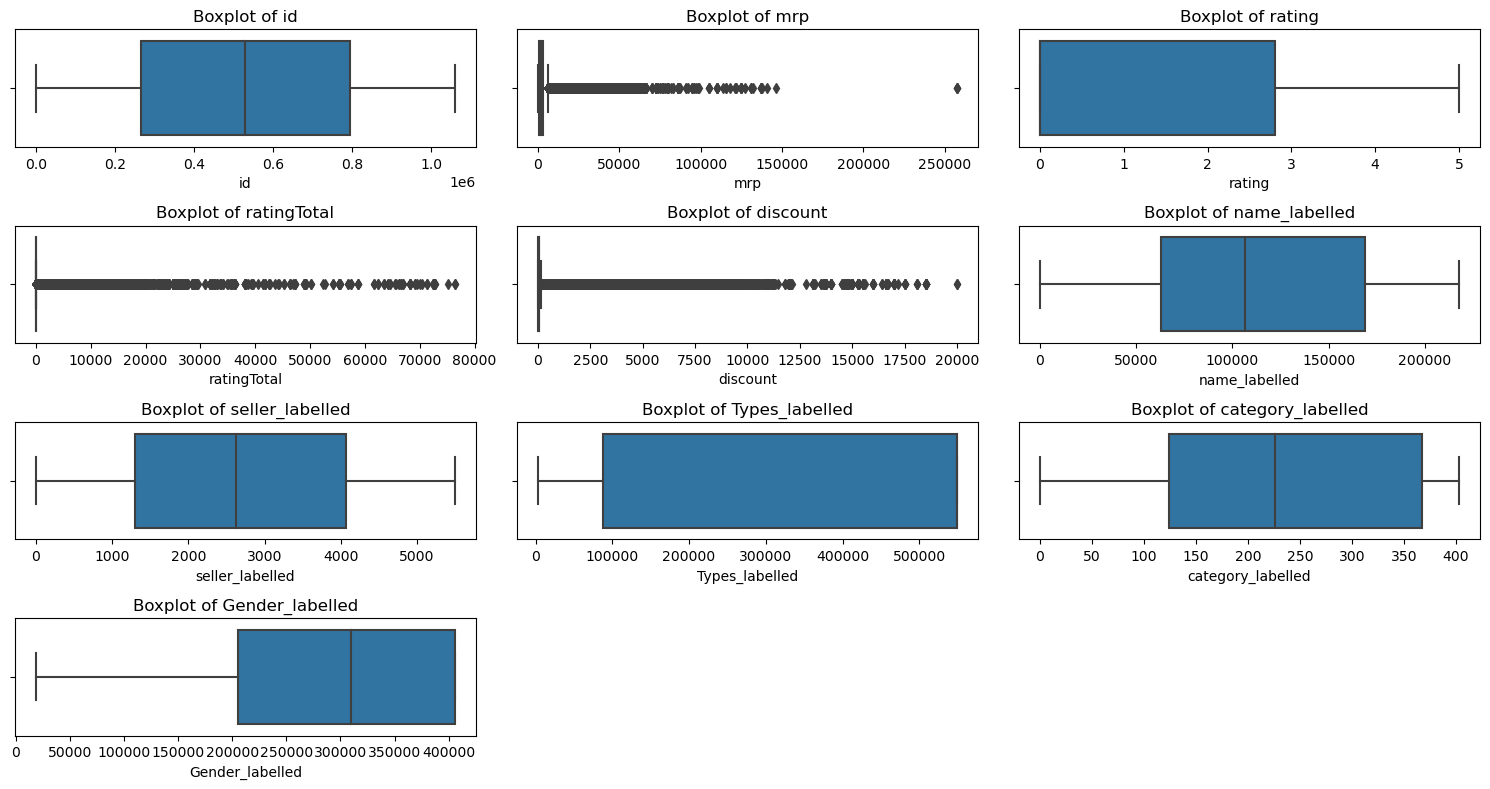

In [16]:
# Selecting relevant numeric columns for analysis.

numeric_columns = ['id','mrp','rating','ratingTotal','discount','name_labelled','seller_labelled','Types_labelled','category_labelled','Gender_labelled']

# Creating the box plots for each numeric variable
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_1[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [17]:
df_1.describe()

,id,price,mrp,rating,ratingTotal,discount,name_labelled,seller_labelled,category_labelled,Gender_labelled,Types_labelled
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,2.668379e+03,1.060150e+00,4.189618e+01,1.496420e+02,1.138026e+05,2.700359e+03,2.348877e+02,2.995700e+05,3.385860e+05
std,3.060573e+05,3.051140e+03,3.877900e+03,1.829632e+00,7.476645e+02,5.648781e+02,6.184676e+04,1.572955e+03,1.207129e+02,1.052886e+05,2.216484e+05
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.848600e+04,3.058000e+03
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01,6.287300e+04,1.298000e+03,1.240000e+02,2.050390e+05,8.772500e+04
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01,1.063310e+05,2.621000e+03,2.260000e+02,3.096560e+05,5.489380e+05
75%,7.951600e+05,1.497000e+03,2.999000e+03,2.800000e+00,3.000000e+00,6.800000e+01,1.690780e+05,4.070000e+03,3.670000e+02,4.057430e+05,5.489380e+05
max,1.060213e+06,2.575000e+05,2.575000e+05,5.000000e+00,7.640000e+04,1.999600e+04,2.177370e+05,5.495000e+03,4.030000e+02,4.057430e+05,5.489380e+05


### As we can notice from the above table there are outlier in most of the dependent and independent feature

### We are using IQR technique for identifing the outlier and replacing with the median of the column

In [11]:
numeric_columns = ['mrp','rating','ratingTotal','discount','Types_labelled']

for i, column in enumerate(numeric_columns, 1):
    # Calculating the IQR (Interquartile Range)
    Q1 = df_1[column].quantile(0.25)
    Q3 = df_1[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing the outliers with the median
    df_1[column] = np.where((df_1[column] < lower_bound) | (df_1[column] > upper_bound), df_1[column].median(), df_1[column])

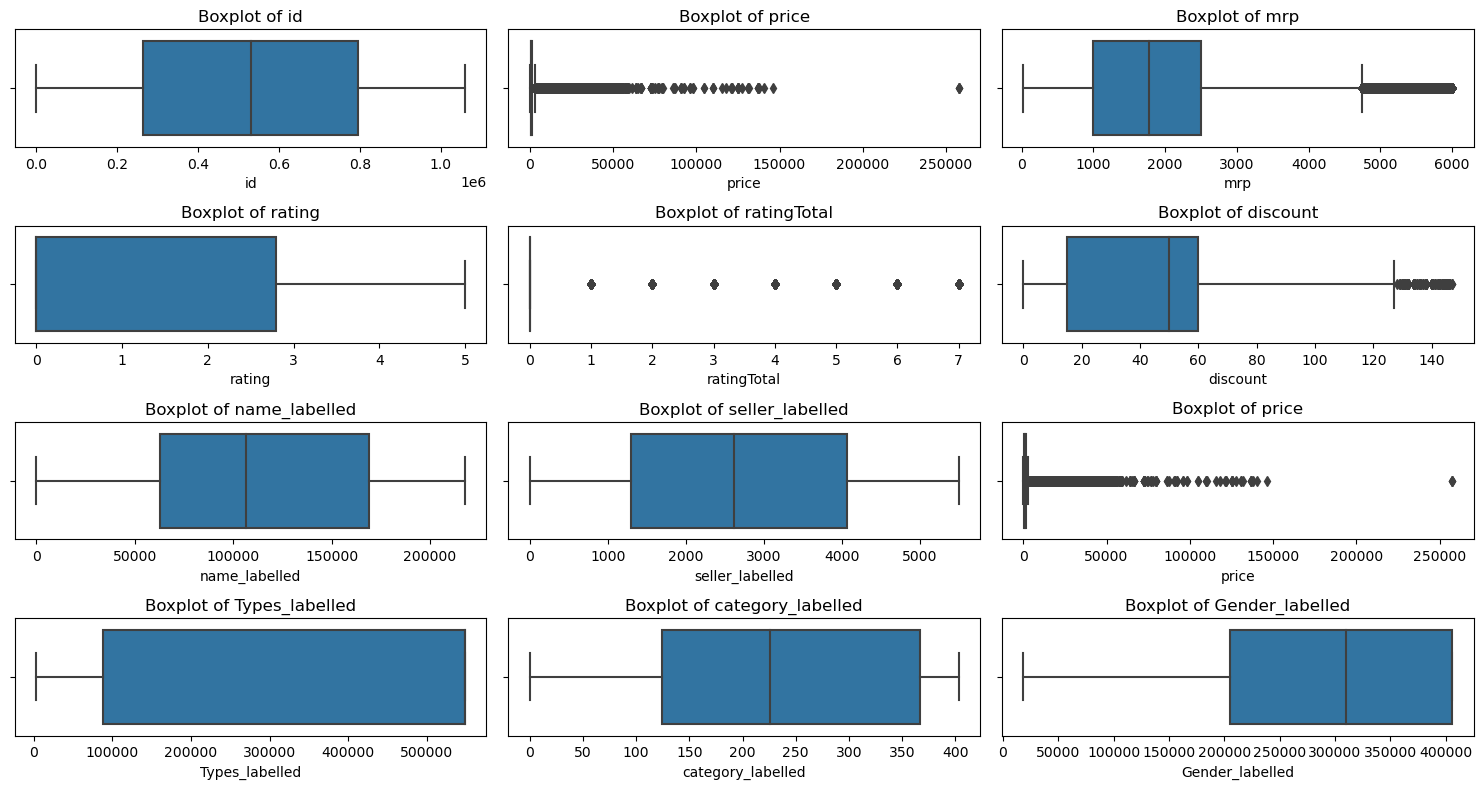

In [19]:
numeric_columns = ['id','price','mrp','rating','ratingTotal','discount','name_labelled','seller_labelled','price','Types_labelled','category_labelled','Gender_labelled']

# Creating the box plots for each numeric variable
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df_1[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [14]:
df_1.describe()

,id,price,mrp,rating,ratingTotal,discount,name_labelled,seller_labelled,category_labelled,Gender_labelled,Types_labelled
count,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06,1.060213e+06
mean,5.301070e+05,1.536235e+03,1.912257e+03,1.060150e+00,3.373482e-01,4.024846e+01,1.138026e+05,2.700359e+03,2.348877e+02,2.995700e+05,3.385860e+05
std,3.060573e+05,3.051140e+03,1.237952e+03,1.829632e+00,1.333627e+00,2.647922e+01,6.184676e+04,1.572955e+03,1.207129e+02,1.052886e+05,2.216484e+05
min,1.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.848600e+04,3.058000e+03
25%,2.650540e+05,4.990000e+02,9.990000e+02,0.000000e+00,0.000000e+00,1.500000e+01,6.287300e+04,1.298000e+03,1.240000e+02,2.050390e+05,8.772500e+04
50%,5.301070e+05,8.110000e+02,1.780000e+03,0.000000e+00,0.000000e+00,5.000000e+01,1.063310e+05,2.621000e+03,2.260000e+02,3.096560e+05,5.489380e+05
75%,7.951600e+05,1.497000e+03,2.499000e+03,2.800000e+00,0.000000e+00,6.000000e+01,1.690780e+05,4.070000e+03,3.670000e+02,4.057430e+05,5.489380e+05
max,1.060213e+06,2.575000e+05,5.999000e+03,5.000000e+00,7.000000e+00,1.470000e+02,2.177370e+05,5.495000e+03,4.030000e+02,4.057430e+05,5.489380e+05


# Data Analyzing :

C:\Users\nikhi\AppData\Local\Temp\ipykernel_14040\2661640608.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[column])
C:\Users\nikhi\AppData\Local\Temp\ipykernel_14040\2661640608.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[column])
C:\Users\nikhi\AppData\Local\Temp\ipykerne

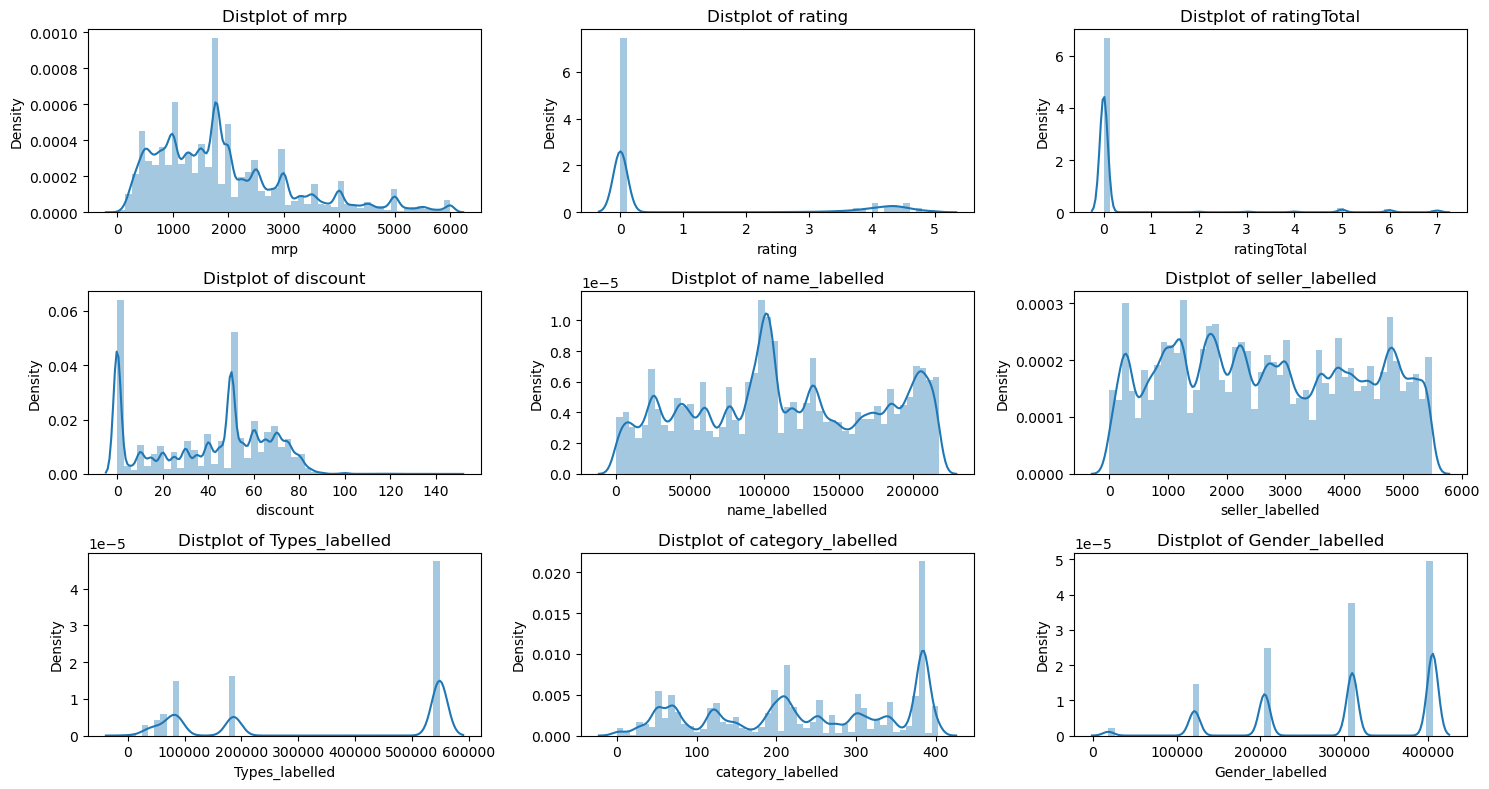

In [21]:
numeric_columns = ['mrp','rating','ratingTotal','discount','name_labelled','seller_labelled','Types_labelled','category_labelled','Gender_labelled']

# Creating the box plots for each numeric variable
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.distplot(df_1[column])
    plt.title(f'Distplot of {column}')

plt.tight_layout()
plt.show()

### As we can notice, there are features in which distribution of data is not a guassian distribution.

### We are using Log Transformation to make it guassian distribution.

In [12]:
# Step 3: Identify the columns to transform
columns_to_transform = ['discount','mrp']  # replace with your actual column names

# Step 4: Apply the log transformation
# Adding a small constant to avoid taking log of zero
for col in columns_to_transform:
    df_1[col+'_updated'] = df_1[col].apply(lambda x: np.log(x + 1))

print(df.head())  # Display the first few rows of the transformed dataset

   id                                    name  \
0   1              Men Solid Oversized Cotton   
1   2          Men Cotton Pure Cotton T-shirt   
2   3               Women Pure Cotton T-shirt   
3   4                Typography Print T-shirt   
4   5  Printed Round Neck Pure Cotton T-shirt   

                                                 img asin  price     mrp  \
0  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  532.0  1299.0   
1  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  274.0   499.0   
2  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  551.0  1199.0   
3  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  296.0  1099.0   
4  https://assets.myntassets.com/f_webp,dpr_1.0,q...    -  494.0   899.0   

   rating  ratingTotal  discount                 seller  ... Gender1 Gender2  \
0     4.1          0.0      59.0  Difference of Opinion  ...  Unisex     Men   
1     4.2          0.0      45.0               Roadster  ...  Unisex     Men   
2     4.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_14040\3079312543.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[column])
C:\Users\nikhi\AppData\Local\Temp\ipykernel_14040\3079312543.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[column])
C:\Users\nikhi\AppData\Local\Temp\ipykerne

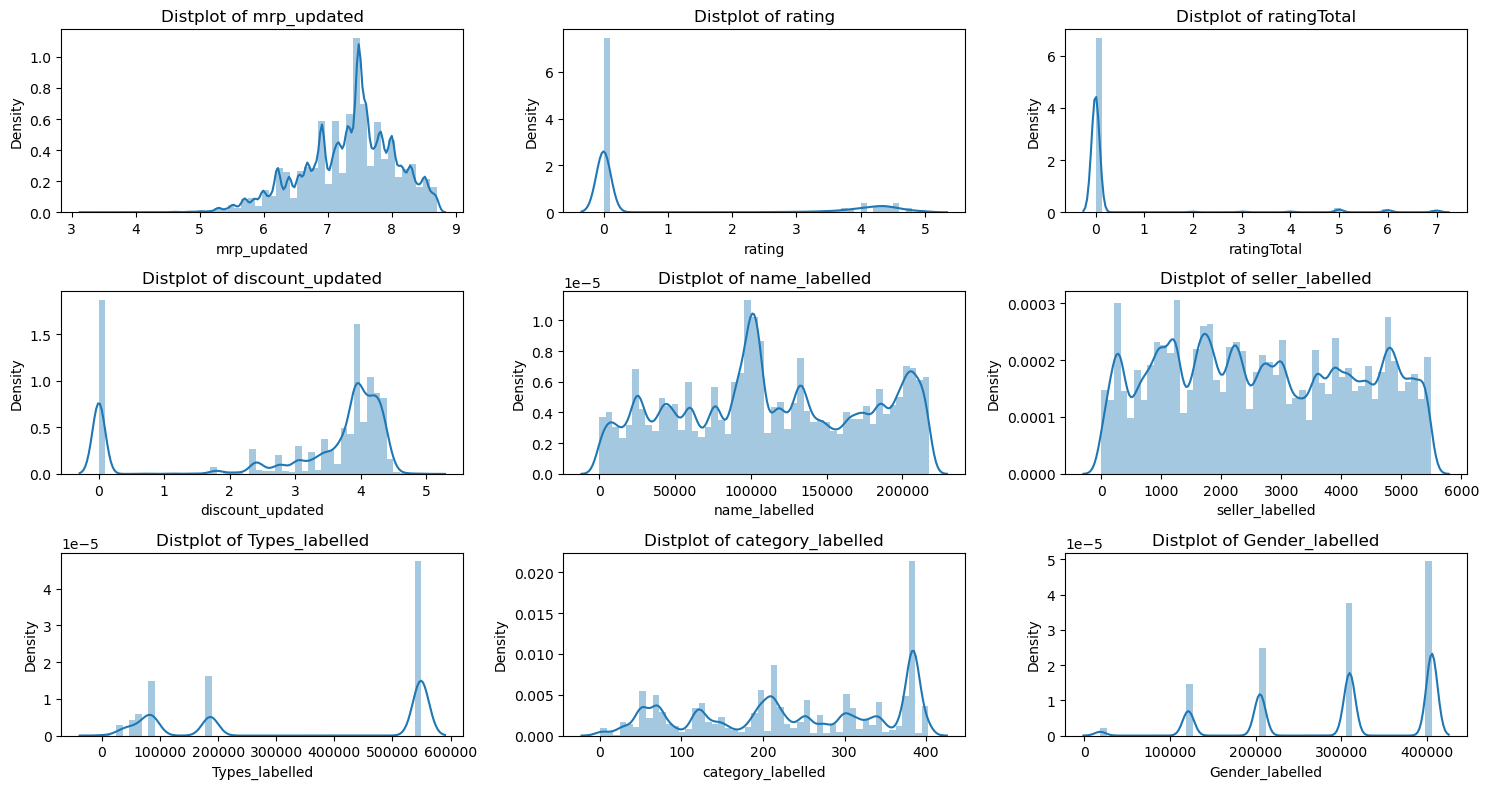

In [24]:
numeric_columns = ['mrp_updated','rating','ratingTotal','discount_updated','name_labelled','seller_labelled','Types_labelled','category_labelled','Gender_labelled']

# Creating the box plots for each numeric variable
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.distplot(df_1[column])
    plt.title(f'Distplot of {column}')

plt.tight_layout()
plt.show()

# Model Selection :

### Now checking the Correlation between Independent features and Dependent feature

In [16]:
df_numerical = df_1[["id",'price','mrp_updated','rating','ratingTotal','discount_updated','name_labelled','seller_labelled','Types_labelled','category_labelled','Gender_labelled']]

In [17]:
df_numerical.corr()

,id,price,mrp_updated,rating,ratingTotal,discount_updated,name_labelled,seller_labelled,Types_labelled,category_labelled,Gender_labelled
id,1.000000,-0.027656,0.056003,-0.095192,-0.015366,0.077246,-0.051891,0.000966,0.290498,0.097488,-0.113024
price,-0.027656,1.000000,0.204764,-0.101084,-0.036297,-0.177887,-0.051966,-0.045643,-0.128347,0.018714,0.018479
mrp_updated,0.056003,0.204764,1.000000,-0.107795,-0.021517,0.277134,0.058028,-0.005751,0.047597,0.006836,0.035748
rating,-0.095192,-0.101084,-0.107795,1.000000,0.415831,0.055623,0.039952,0.048013,0.075410,0.083162,-0.067267
ratingTotal,-0.015366,-0.036297,-0.021517,0.415831,1.000000,0.022803,0.012206,0.004416,0.026912,0.017282,-0.011140
discount_updated,0.077246,-0.177887,0.277134,0.055623,0.022803,1.000000,0.027371,-0.006923,0.058238,0.011900,0.018543
name_labelled,-0.051891,-0.051966,0.058028,0.039952,0.012206,0.027371,1.000000,-0.003157,-0.007882,0.074236,0.127879
seller_labelled,0.000966,-0.045643,-0.005751,0.048013,0.004416,-0.006923,-0.003157,1.000000,0.042413,0.033497,-0.004306
Types_labelled,0.290498,-0.128347,0.047597,0.075410,0.026912,0.058238,-0.007882,0.042413,1.000000,0.351639,-0.188967
category_labelled,0.097488,0.018714,0.006836,0.083162,0.017282,0.011900,0.074236,0.033497,0.351639,1.000000,-0.434367


### From a|bove, we can tell correlation between mrp , rating , ratingTotal and Discount (independent feature) with price (dependent feature) is pretty nice

### name_labelled and seller_labelled columns as correlation almost similar with price, therefore we can drop any one features

In [13]:
df_input = df_1[['mrp_updated','rating','discount_updated','name_labelled','Types_labelled','name_labelled','category_labelled','seller_labelled']]
df_output = df_1[['price']]

In [14]:
df_2 = df_1[['mrp_updated','rating','discount_updated','name_labelled','Types_labelled','name_labelled','category_labelled','seller_labelled','price']]

In [17]:
df_2.to_csv("Updated_capstone_dataset.csv",index = False)

In [18]:
df_output.head()

,price
0,532.0
1,274.0
2,551.0
3,296.0
4,494.0


# Model Training :

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_input,df_output,test_size = 0.3, random_state = 42)

### Using Linear Regression Techinique for training the model

In [64]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [65]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.13153023398962327
Coefficient of determination R^2 <-- on test set: 0.13030578852555297


We had get accuracy of Linear regression for training data is 0.43,
We had get accuracy of Linear regression for testing data is 0.43

### Using Decision Tree Techinique for training the model 

In [66]:
# Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [67]:
print("Coefficient of determination R^2 <-- on train set: {}".format(decision_tree_model.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(decision_tree_model.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9811676065196183
Coefficient of determination R^2 <-- on test set: 0.9286409163597833


We had get accuracy of Decision Tree for training data is 0.99, We had get accuracy of Decision Tree for testing data is 0.94

There is fine difference between the accuracy of the training and testing data, in this case the model may be overfitted. Therefore we will use Hyperparameter tuning to prevent the overfitting the model

# Model Tuning :

In [70]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Set up the parameter grid for Grid Search
param_grid = {
    "splitter"    : ["best","random"],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [ 1,2,3,4,5 ],
    'min_samples_leaf': [None,10,20,30,40,50]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test set RMSE: {rmse}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nikhi\anaconda3\Lib\site-packa

Best parameters found: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.9109586829121084
Test set RMSE: 918.5831526501929


Best parameter for the Decision tree for max-depth = None, min_samples_leaf = 10, min_samples_split = 2 and splitter = best.

### Using hyperparameter, we find best parameter for the decision tree model 

In [68]:
decision_tree_model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=10, min_samples_split=2, splitter='best', random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

In [69]:
print("Coefficient of determination R^2 <-- on train set: {}".format(decision_tree_model.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(decision_tree_model.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9361803841302873
Coefficient of determination R^2 <-- on test set: 0.9100628883854041


After Hyperparameter tuning, We had get accuracy of Decision Tree for training data is 0.95, We had get accuracy of Decision Tree for testing data is 0.94

In [71]:
# Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(random_forest_model.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(random_forest_model.score(X_test, y_test)))

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Coefficient of determination R^2 <-- on train set: 0.976769464575438
Coefficient of determination R^2 <-- on test set: 0.9409180946622155


We had get accuracy of Random Forest for training data is 0.99, We had get accuracy of Random Forest for testing data is 0.94

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")



Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [72]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [73]:
print("Coefficient of determination R^2 <-- on train set: {}".format(gbr.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(gbr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7369308696974238
Coefficient of determination R^2 <-- on test set: 0.7237476202201494


We had get accuracy of Gradient Boosting for training data is 0.82, We had get accuracy of Gradient Boosting for testing data is 0.83

## We had get best accuracy of the model using Decision Tree Techinique 
Testing data accuracy is 0.95,Training data accuracy is 0.94

# THANK YOU !!

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame `df` with your dataset and target variable `y`
X = df.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = df['target']  # Replace 'target' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest regressor
rf = RandomForestRegressor()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
